In [1]:
# Untuk melakukan perbaikan contrast pada suatu citra terdapat beberapa metode, diantaranya :

# Histogram Equalization [1], [3]
# Contrast Limited Adaptive Histogram Equalization (CLAHE) [1], [2], [3]
# Min-Max Contrast Stretching [1]
# Perkalian Konstanta

# Mengimport Library yang akan digunakan
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
import cv2
import matplotlib.image as mpimg
from skimage import data

smile_cat = cv2.imread("images\smile_cat.jpg", cv2.IMREAD_GRAYSCALE)  # Load gambar dari local drive dalam format grayscale

# 1) PENERAPAN HISTOGRAM EQUALIZATION (HE)
image_equalized = cv2.equalizeHist(smile_cat)   # Memanggil fungsi equalize historgram dengan openCV kemudian hasilnya ditampung dalam image_equalized


In [2]:
# 2) PENERAPAN METODE CLAHE (CONTRAST LIMITED ADAPTIVE HISTOGRAM EQUALIZATION)
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))

#Apply CLAHE to the original image
image_clahe = clahe.apply(smile_cat)

In [3]:
# 3) PENERAPAN METODE CONTRAST STRETCHING (CS)
image_cs = np.zeros((smile_cat.shape[0],smile_cat.shape[1]),dtype = 'uint8')    # Membuat array kosong untuk menampung hasil perbaikan contrast

min = np.min(smile_cat)     # Menerapkan batas minimal contrast dengan np.min
max = np.max(smile_cat)     # Menerapkan batas maksimal contrast dengan np.max

# Membuat perulangan array y dan x dari shape gambar
for i in range(smile_cat.shape[0]):
    for j in range(smile_cat.shape[1]):
        image_cs[i,j] = 255*(smile_cat[i,j]-min)/(max-min)  # Mengubah nilai kontrasnya dengan menggunakan rumus normalisasi

In [4]:
# 4) PENERAPAN METODE PERKALIAN KONSTANTA
copyCat = smile_cat.copy().astype(float)   # Membuat copy dari citra image dan mengubah tipe datanya menjadi float 
m1,n1 = copyCat.shape                  # Mengambil dimensi baris (m1) dan dimensi kolom (n1) dari citra 
output1 = np.empty([m1, n1])            # Membuat matriks kosong dengan ukuran m1 baris dan n1 kolom
for baris in range(0, m1-1):            # Membuat perulangan for untuk mengiterasi melalui setiap piksel pada citra
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyCat[baris, kolom] * 1.9 # Mengalikan nilai piksel asli dengan konstanta 1.9

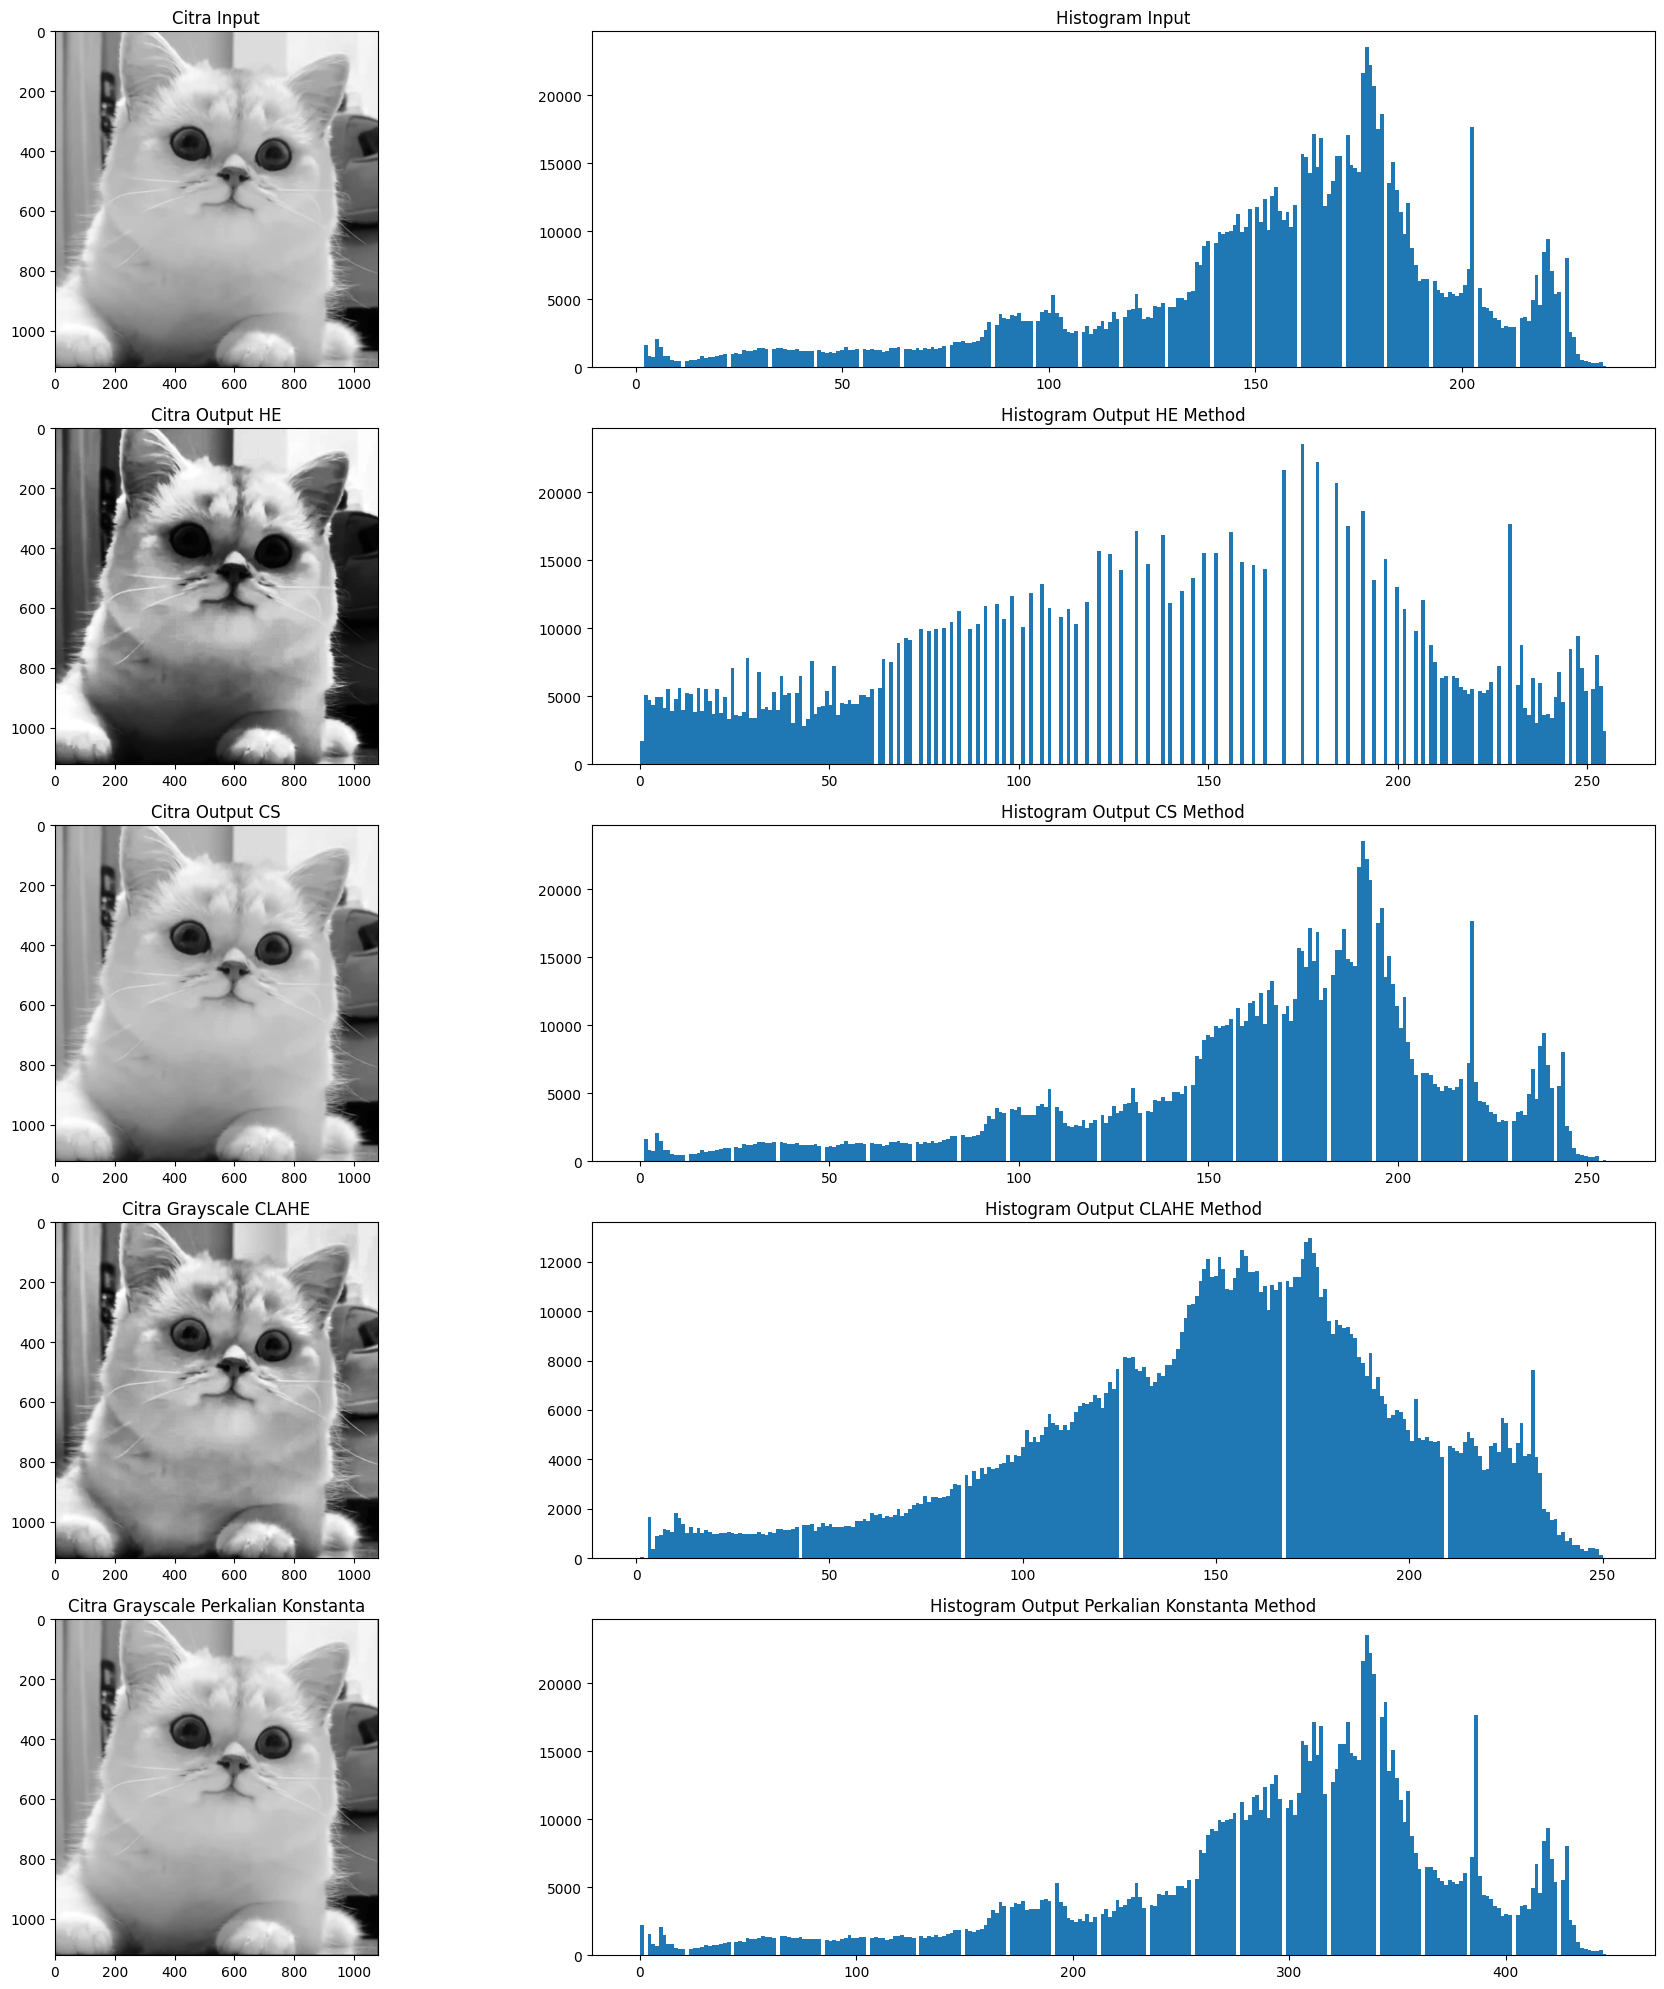

In [6]:
# PLOT IMAGE
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()
# Menampilkan citra input dan histogram dari smile_cat
ax[0].imshow(smile_cat, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(smile_cat.ravel(), bins=256)
ax[1].set_title('Histogram Input')

# Menampilkan citra dan histogram hasil ekualisasi histogram
ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

# Menampilkan citra hasil kontras stretching dan histogramnya
ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

# Menampilkan citra dan histogram hasil CLAHE
ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

# Menampilkan citra dan histogram hasil perkalian konstanta
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout()